# Modelling

In [1]:
#Importing all the libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#### LINEAR REGRESSION

In [3]:
# Load the GamingAccessoryWeeklyFinal.csv file which is generated by eda part.
GamingAccessoryWeekly=pd.read_csv('GamingAccessoryWeeklyFinal.csv')

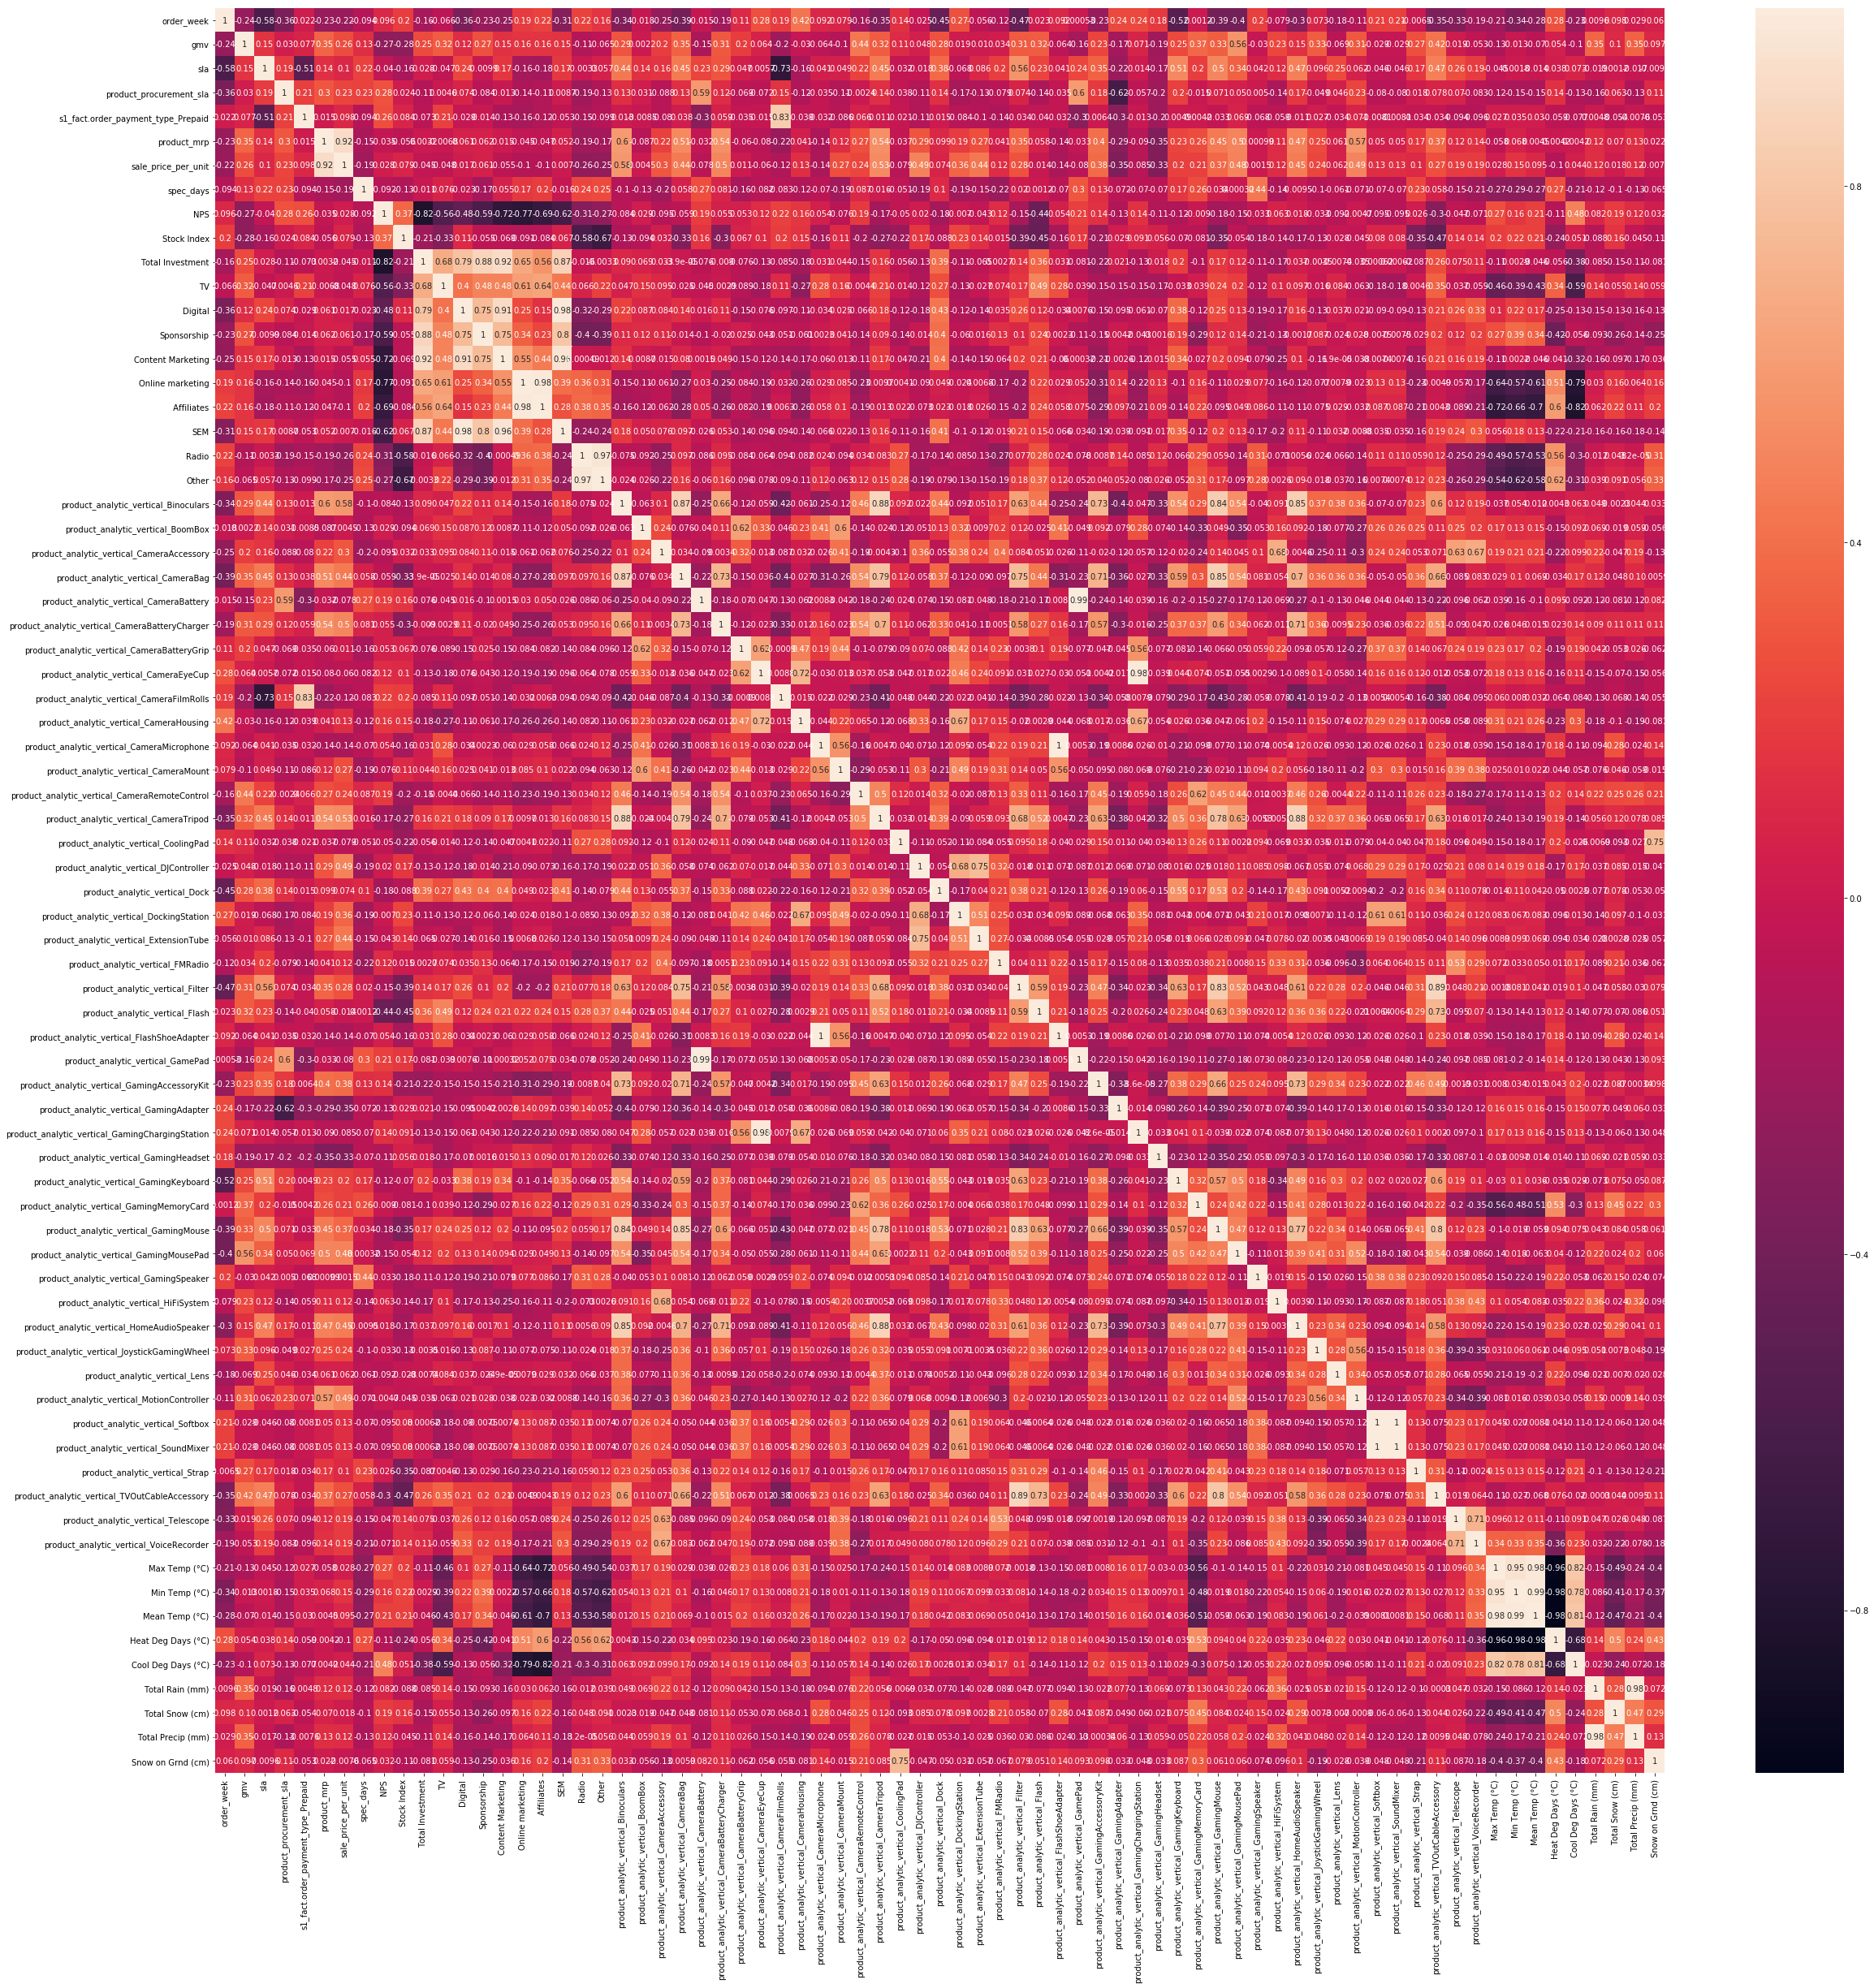

In [4]:
#Try to visulise it.
plt.figure(figsize=(40,40))
sns.heatmap(GamingAccessoryWeekly.corr(), annot=True)
plt.show()

In [5]:
#Using the above heat map, its difficult to remove multicollinearty
# so we will be doing VIF check and RFE
#checking basic info of dataframe
GamingAccessoryWeekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 73 columns):
order_week                                         53 non-null float64
gmv                                                40 non-null float64
sla                                                40 non-null float64
product_procurement_sla                            40 non-null float64
s1_fact.order_payment_type_Prepaid                 40 non-null float64
product_mrp                                        40 non-null float64
sale_price_per_unit                                40 non-null float64
spec_days                                          40 non-null float64
NPS                                                40 non-null float64
Stock Index                                        40 non-null float64
Total Investment                                   40 non-null float64
TV                                                 40 non-null float64
Digital                                      

In [6]:
# removing the Nan from final 
GamingAccessoryWeekly_f=GamingAccessoryWeekly[GamingAccessoryWeekly.gmv.isnull() ==False]

In [7]:
GamingAccessoryWeekly_f.shape

(40, 73)

In [8]:
# divide data into train and test
df_train,df_test = train_test_split(GamingAccessoryWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [9]:
# Standardise the data
scaler = StandardScaler()
scaler.fit(GamingAccessoryWeekly_f)

# divide data into train and test
df_train,df_test = train_test_split(GamingAccessoryWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [10]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

72

##### Using Grid Serach CV to tune feature hyperparameter

In [11]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [12]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.066194,0.014338,0.000800,0.000400,1,{'n_features_to_select': 1},-0.808574,-0.535248,-1.260116,0.346689,...,-0.850201,0.736635,1,0.182248,0.020190,0.000186,0.084021,0.122862,0.081901,0.066689
1,0.042599,0.001200,0.000000,0.000000,2,{'n_features_to_select': 2},-0.596540,-0.425181,-1.688470,-0.001340,...,-0.976436,0.805093,2,0.337805,0.105460,0.026181,0.104291,0.138807,0.142509,0.104422
2,0.048199,0.004956,0.000607,0.000496,3,{'n_features_to_select': 3},-0.601475,-0.430976,-6.613962,-549.719302,...,-100.250929,209.578390,3,0.337994,0.209868,0.107774,0.138597,0.156701,0.190187,0.081005
3,0.043198,0.001469,0.000601,0.000491,4,{'n_features_to_select': 4},-0.467992,-0.808489,-7.852032,-1814.036738,...,-326.663039,693.497097,4,0.392060,0.684345,0.188995,0.545111,0.374174,0.436937,0.167536
4,0.043197,0.004877,0.000599,0.000489,5,{'n_features_to_select': 5},-0.419531,-0.588422,-13.257168,-1797.755995,...,-339.510336,680.612066,5,0.395510,0.808441,0.447774,0.545119,0.673040,0.573977,0.150597
5,0.042205,0.001725,0.000200,0.000400,6,{'n_features_to_select': 6},-0.420738,-0.690349,-17.881930,-6680.652261,...,-1229.028481,2542.661706,6,0.395577,0.854995,0.629983,0.588667,0.726272,0.639099,0.152407
6,0.043797,0.002712,0.000802,0.000401,7,{'n_features_to_select': 7},-1.883709,-0.562813,-29.696252,-6931.660528,...,-1275.400660,2637.955997,7,0.743637,0.867104,0.789708,0.592043,0.732085,0.744915,0.089970
7,0.042797,0.002317,0.000200,0.000401,8,{'n_features_to_select': 8},-1.773128,-0.761917,-29.681436,-8329.296522,...,-1527.172818,3172.187672,8,0.759416,0.899176,0.789713,0.595661,0.746410,0.758075,0.097393
8,0.069600,0.014305,0.000399,0.000488,9,{'n_features_to_select': 9},-4.282136,-0.969399,-30.549052,-28809.199758,...,-5187.103537,11014.078323,10,0.782770,0.925598,0.792536,0.666403,0.784408,0.790343,0.082161
9,0.041006,0.001082,0.000399,0.000489,10,{'n_features_to_select': 10},-7.880177,-0.993226,-33.752396,-41029.384312,...,-7377.359330,15690.554179,19,0.800081,0.934303,0.823480,0.783637,0.819535,0.832207,0.053012


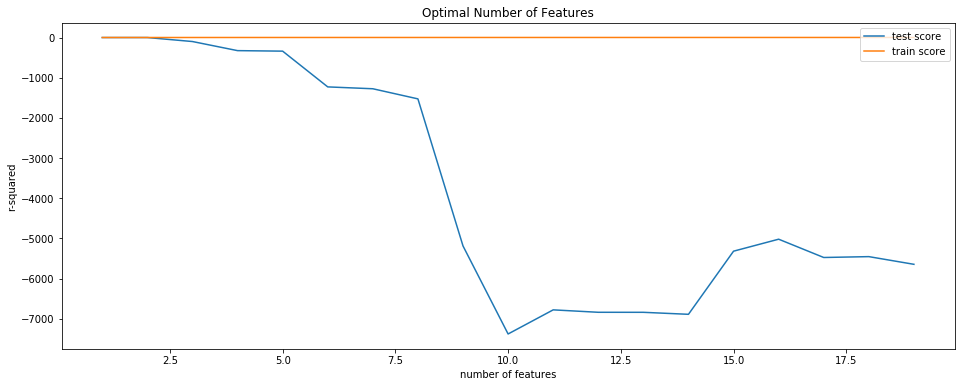

In [13]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [14]:
#8 seems optimal no of features 
print(df_train.shape)
print(df_test.shape)

(28, 72)
(12, 72)


In [15]:
# Running RFE with the output number of the variable equal to 10
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [16]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('order_week', False, 60),
 ('sla', False, 29),
 ('product_procurement_sla', False, 36),
 ('s1_fact.order_payment_type_Prepaid', False, 25),
 ('product_mrp', False, 62),
 ('sale_price_per_unit', False, 63),
 ('spec_days', False, 17),
 ('NPS', False, 16),
 ('Stock Index', False, 40),
 ('Total Investment', False, 42),
 ('TV', False, 14),
 ('Digital', False, 45),
 ('Sponsorship', False, 35),
 ('Content Marketing', False, 5),
 ('Online marketing', False, 28),
 (' Affiliates', False, 9),
 ('SEM', False, 33),
 ('Radio', False, 44),
 ('Other', False, 31),
 ('product_analytic_vertical_Binoculars', False, 51),
 ('product_analytic_vertical_BoomBox', True, 1),
 ('product_analytic_vertical_CameraAccessory', False, 21),
 ('product_analytic_vertical_CameraBag', False, 13),
 ('product_analytic_vertical_CameraBattery', True, 1),
 ('product_analytic_vertical_CameraBatteryCharger', False, 10),
 ('product_analytic_vertical_CameraBatteryGrip', True, 1),
 ('product_analytic_vertical_CameraEyeCup', False, 

In [17]:
col = x_train.columns[rfe.support_]
col

Index(['product_analytic_vertical_BoomBox',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_SoundMixer'],
      dtype='object')

In [18]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [19]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [20]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [21]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1.822
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.133
Time:                        20:53:23   Log-Likelihood:                -430.29
No. Observations:                  28   AIC:                             882.6
Df Residuals:                      17   BIC:                             897.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [22]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,product_analytic_vertical_GamePad,8488.72
2,product_analytic_vertical_CameraBattery,3325.83
9,product_analytic_vertical_HomeAudioSpeaker,996.19
8,product_analytic_vertical_GamingSpeaker,175.32
4,product_analytic_vertical_CameraTripod,166.40
10,product_analytic_vertical_SoundMixer,52.38
1,product_analytic_vertical_BoomBox,28.25
3,product_analytic_vertical_CameraBatteryGrip,12.29
0,const,8.87
5,product_analytic_vertical_DJController,4.62


###### Making a Function to check VIF since it will be used again and again

In [23]:
def checkVIF(dataframe):
    
    vif = pd.DataFrame()
    X = dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [24]:
#Model 2
#dropping product_analytic_vertical_GamePad due to high VIF value
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_GamePad"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     2.143
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0806
Time:                        20:54:43   Log-Likelihood:                -430.29
No. Observations:                  28   AIC:                             880.6
Df Residuals:                      18   BIC:                             893.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [25]:
# Calculate the VIFs for the new model
checkVIF(x_train_md2)

,Features,VIF
4,product_analytic_vertical_CameraTripod,9.75
0,const,8.82
8,product_analytic_vertical_HomeAudioSpeaker,6.84
5,product_analytic_vertical_DJController,4.62
6,product_analytic_vertical_ExtensionTube,4.22
2,product_analytic_vertical_CameraBattery,3.58
1,product_analytic_vertical_BoomBox,3.23
3,product_analytic_vertical_CameraBatteryGrip,2.37
9,product_analytic_vertical_SoundMixer,1.95
7,product_analytic_vertical_GamingSpeaker,1.85


In [26]:
#Model 3
#dropping product_analytic_vertical_CameraTripod due to high P and  VIF
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_CameraTripod"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     2.324
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0628
Time:                        21:01:45   Log-Likelihood:                -430.93
No. Observations:                  28   AIC:                             879.9
Df Residuals:                      19   BIC:                             891.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [27]:
# Calculate the VIFs for the new model
checkVIF(x_train_md3)

,Features,VIF
0,const,8.82
4,product_analytic_vertical_DJController,4.62
5,product_analytic_vertical_ExtensionTube,4.22
7,product_analytic_vertical_HomeAudioSpeaker,1.99
1,product_analytic_vertical_BoomBox,1.97
3,product_analytic_vertical_CameraBatteryGrip,1.95
2,product_analytic_vertical_CameraBattery,1.94
8,product_analytic_vertical_SoundMixer,1.92
6,product_analytic_vertical_GamingSpeaker,1.83


In [28]:
#Model 4
# Seems VIF for each features is fine
#dropping product_analytic_vertical_HomeAudioSpeaker due to high P value
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_HomeAudioSpeaker"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     2.705
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0381
Time:                        21:03:14   Log-Likelihood:                -431.16
No. Observations:                  28   AIC:                             878.3
Df Residuals:                      20   BIC:                             889.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [29]:
# Calculate the VIFs for the new model
checkVIF(x_train_md4)

,Features,VIF
0,const,7.46
4,product_analytic_vertical_DJController,4.62
5,product_analytic_vertical_ExtensionTube,4.21
1,product_analytic_vertical_BoomBox,1.94
3,product_analytic_vertical_CameraBatteryGrip,1.93
7,product_analytic_vertical_SoundMixer,1.78
6,product_analytic_vertical_GamingSpeaker,1.36
2,product_analytic_vertical_CameraBattery,1.17


In [30]:
#Removing SEM and building model due to very high VIF
#Model 5
#dropping product_analytic_vertical_SoundMixer due to high P value
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_SoundMixer"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     3.095
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0248
Time:                        21:03:59   Log-Likelihood:                -431.61
No. Observations:                  28   AIC:                             877.2
Df Residuals:                      21   BIC:                             886.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [31]:
checkVIF(x_train_md5)

,Features,VIF
0,const,7.32
5,product_analytic_vertical_ExtensionTube,3.98
4,product_analytic_vertical_DJController,3.93
1,product_analytic_vertical_BoomBox,1.91
3,product_analytic_vertical_CameraBatteryGrip,1.83
2,product_analytic_vertical_CameraBattery,1.17
6,product_analytic_vertical_GamingSpeaker,1.08


In [32]:
#Model 6
#Removing product_analytic_vertical_GamingSpeaker and building model due to very high P
x_train_md6 = x_train_md5.drop(["product_analytic_vertical_GamingSpeaker"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     3.138
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0275
Time:                        21:04:36   Log-Likelihood:                -432.95
No. Observations:                  28   AIC:                             877.9
Df Residuals:                      22   BIC:                             885.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [33]:
checkVIF(x_train_md6)

,Features,VIF
0,const,6.55
5,product_analytic_vertical_ExtensionTube,3.93
4,product_analytic_vertical_DJController,3.89
1,product_analytic_vertical_BoomBox,1.91
3,product_analytic_vertical_CameraBatteryGrip,1.82
2,product_analytic_vertical_CameraBattery,1.12


In [34]:
#Model 7
#dropping product_analytic_vertical_ExtensionTube due to high P value
x_train_md7 = x_train_md6.drop(["product_analytic_vertical_ExtensionTube"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md7)
lm7 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2.730
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0540
Time:                        21:05:00   Log-Likelihood:                -435.05
No. Observations:                  28   AIC:                             880.1
Df Residuals:                      23   BIC:                             886.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [35]:
checkVIF(x_train_md7)

,Features,VIF
0,const,6.51
1,product_analytic_vertical_BoomBox,1.90
3,product_analytic_vertical_CameraBatteryGrip,1.80
2,product_analytic_vertical_CameraBattery,1.11
4,product_analytic_vertical_DJController,1.03


In [38]:
#Model 8
#dropping product_analytic_vertical_DJController due to high P value
x_train_md8 = x_train_md7.drop(["product_analytic_vertical_DJController"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md8)
lm8 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     3.639
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0270
Time:                        21:07:17   Log-Likelihood:                -435.24
No. Observations:                  28   AIC:                             878.5
Df Residuals:                      24   BIC:                             883.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [39]:
checkVIF(x_train_md8)

,Features,VIF
0,const,6.42
1,product_analytic_vertical_BoomBox,1.86
3,product_analytic_vertical_CameraBatteryGrip,1.76
2,product_analytic_vertical_CameraBattery,1.11


#### Residual Analysis of the train data

In [40]:
y_train_gmv = lm8.predict(x_train_lm)

Text(0.5,0,'Errors')

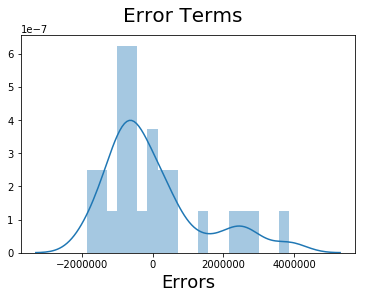

In [41]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_gmv), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [42]:
X_test2=X_test[['product_analytic_vertical_BoomBox','product_analytic_vertical_CameraBatteryGrip',\
                'product_analytic_vertical_CameraBattery']]
X_test_lm = sm.add_constant(X_test2)

In [43]:
# Making predictions using the Seventh Model
y_pred = lm8.predict(X_test_lm)

Text(0,0.5,'y_pred')

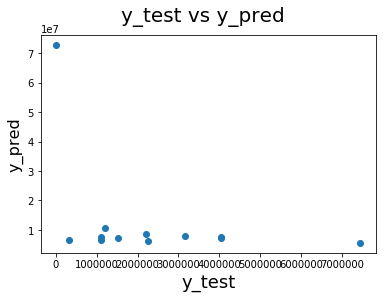

In [45]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [46]:
#RMSE calculation test data
math.sqrt(np.mean(np.square((y_pred-y_test))))

21659706.79209284

### Multiplicative Model

In [47]:
# taking log of the data
GamingAccessoryWeekly_log=np.log(GamingAccessoryWeekly_f.replace(0,0.0001))

In [48]:
#checking null values
GamingAccessoryWeekly_log.isnull

<bound method DataFrame.isnull of     order_week        gmv       sla  product_procurement_sla  \
0     3.332205  14.506227  1.934558                 1.061332   
1     3.367296  13.969036  1.900243                 1.123852   
2     3.401197  14.235888  1.891888                 1.075334   
3     3.433987  13.913260  1.910601                 1.026271   
4     3.583519  15.561748  1.792761                 0.962421   
5     3.610918  14.747712  1.758260                 0.930560   
6     3.637586  14.480535  1.870169                 0.976496   
7     3.663562  14.744114  1.840366                 0.900948   
8     3.688879  14.791595  1.920421                 0.993667   
9     3.713572  14.513870  1.780436                 0.937111   
10    3.737670  15.650413  1.836474                 0.780187   
11    3.761200  14.000446  1.871174                 1.016256   
12    3.784190  13.722148  1.834346                 0.977094   
13    3.806662  14.512174  1.878533                 0.939010   
14    

In [49]:
GamingAccessoryWeekly_log = GamingAccessoryWeekly_log.fillna(0)

In [50]:
GamingAccessoryWeekly_log

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_VoiceRecorder,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,3.332205,14.506227,1.934558,1.061332,-1.114140,7.975428,7.540290,-9.210340,0.566039,3.636737,...,-9.210340,3.212187,2.730029,3.000720,-1.261131,0.868500,1.485385,-9.210340,1.485385,-9.210340
1,3.367296,13.969036,1.900243,1.123852,-1.230959,7.659236,7.241814,-1.299283,0.566039,3.636737,...,-9.210340,3.358638,2.866951,3.143434,-9.210340,1.645448,0.336472,-9.210340,0.336472,-9.210340
2,3.401197,14.235888,1.891888,1.075334,-1.425370,7.604401,7.112534,-9.210340,0.566039,3.636737,...,-3.058036,3.392829,2.809403,3.138100,-9.210340,1.621366,-0.105361,-9.210340,-0.105361,-9.210340
3,3.433987,13.913260,1.910601,1.026271,-1.275010,7.909729,7.268151,-9.210340,0.566039,3.636737,...,-3.005683,3.452630,2.862201,3.201391,-9.210340,1.882006,1.533277,-9.210340,1.533277,-9.210340
4,3.583519,15.561748,1.792761,0.962421,-1.367704,7.745938,7.352319,-9.210340,0.468577,3.608191,...,-3.444682,3.414991,2.928524,3.197039,-9.210340,1.865629,2.312535,-9.210340,2.312535,-9.210340
5,3.610918,14.747712,1.758260,0.930560,-1.334020,7.652526,7.232131,-9.210340,0.447362,3.602777,...,-9.210340,3.157000,2.701361,2.956991,0.246860,0.924259,-0.040822,-9.210340,-0.040822,-9.210340
6,3.637586,14.480535,1.870169,0.976496,-1.629942,7.808396,7.445050,-9.210340,0.447362,3.602777,...,-9.210340,3.208825,2.788093,3.022861,-9.210340,0.936093,-0.597837,-9.210340,-0.597837,-9.210340
7,3.663562,14.744114,1.840366,0.900948,-1.439437,7.757199,7.326670,-9.210340,0.447362,3.602777,...,-9.210340,3.258097,2.674149,2.995732,-9.210340,0.693147,-9.210340,-9.210340,-9.210340,-9.210340
8,3.688879,14.791595,1.920421,0.993667,-1.332097,7.951395,7.328183,-9.210340,0.359216,3.664388,...,-9.210340,2.980619,2.647946,2.874976,0.654926,0.500775,1.313724,-9.210340,1.313724,-9.210340
9,3.713572,14.513870,1.780436,0.937111,-1.481345,7.827555,7.270520,-9.210340,0.359216,3.664388,...,-2.866274,3.054001,2.484907,2.810607,0.322083,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340


In [51]:
# import Scaling the data
scaler = StandardScaler()
scaler.fit(GamingAccessoryWeekly_log)
# divide data into train and test
df_train,df_test = train_test_split(GamingAccessoryWeekly_log,train_size=0.7,test_size=0.3,random_state=True)

In [52]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

72

In [53]:
len(X_train.columns)
X_train.shape

(28, 72)

In [54]:
# doing cv on log data
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

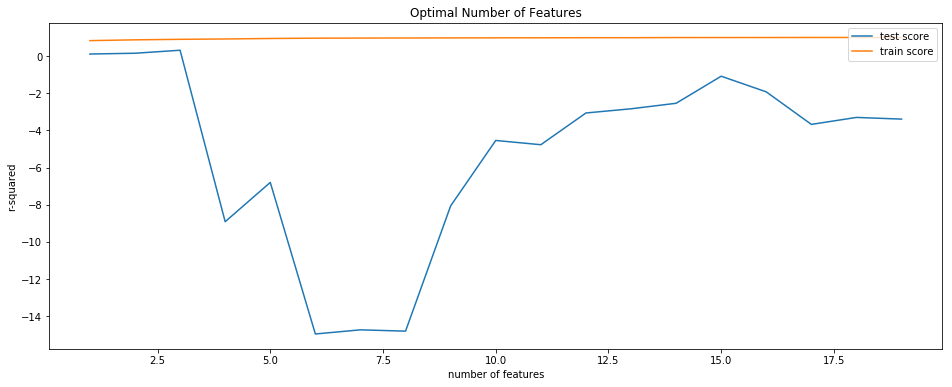

In [55]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [57]:
# Again 10 features seems good
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
col = x_train.columns[rfe.support_]

In [58]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [59]:
col

Index(['s1_fact.order_payment_type_Prepaid', 'product_mrp',
       'Content Marketing', 'Online marketing', ' Affiliates',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_GamingMousePad', 'Min Temp (°C)',
       'Mean Temp (°C)'],
      dtype='object')

In [64]:
# Creating First multiplicative model
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     30.07
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.63e-09
Time:                        21:38:18   Log-Likelihood:                -19.380
No. Observations:                  28   AIC:                             60.76
Df Residuals:                      17   BIC:                             75.41
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [65]:
# Calculate the VIFs for the new model
checkVIF(x_train_rfe)

,Features,VIF
0,const,8944.70
4,Online marketing,2948.92
5,Affiliates,2258.18
3,Content Marketing,75.01
10,Mean Temp (°C),31.24
9,Min Temp (°C),27.55
6,product_analytic_vertical_CameraBattery,4.11
8,product_analytic_vertical_GamingMousePad,3.90
2,product_mrp,2.40
1,s1_fact.order_payment_type_Prepaid,1.44


In [70]:
#Multiplicative Model 2
# Removing Affiliates since it has high p and high VIF
x_train_md2 = x_train_rfe.drop([" Affiliates"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.27e-09
Time:                        21:40:19   Log-Likelihood:                -19.433
No. Observations:                  28   AIC:                             58.87
Df Residuals:                      18   BIC:                             72.19
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [71]:
checkVIF(x_train_md2)

,Features,VIF
0,const,824.67
8,Min Temp (°C),26.54
9,Mean Temp (°C),24.37
4,Online marketing,12.26
3,Content Marketing,10.54
7,product_analytic_vertical_GamingMousePad,3.53
5,product_analytic_vertical_CameraBattery,3.52
2,product_mrp,2.40
1,s1_fact.order_payment_type_Prepaid,1.42
6,product_analytic_vertical_CameraBatteryGrip,1.16


In [72]:
#Multiplicative Model 3
# Removing Min Temp (°C) since it has high p and high VIF
x_train_md3 = x_train_md2.drop(["Min Temp (°C)"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     37.31
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.13e-10
Time:                        21:41:10   Log-Likelihood:                -20.948
No. Observations:                  28   AIC:                             59.90
Df Residuals:                      19   BIC:                             71.89
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [73]:
checkVIF(x_train_md3)

,Features,VIF
0,const,819.56
4,Online marketing,7.94
3,Content Marketing,7.52
7,product_analytic_vertical_GamingMousePad,3.46
5,product_analytic_vertical_CameraBattery,3.18
2,product_mrp,2.39
1,s1_fact.order_payment_type_Prepaid,1.40
8,Mean Temp (°C),1.29
6,product_analytic_vertical_CameraBatteryGrip,1.14


In [74]:
#Multiplicative Model 4
# Removing product_analytic_vertical_CoolingPad  since it has high p 
x_train_md4 = x_train_md3.drop(["Mean Temp (°C)"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     41.98
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.35e-10
Time:                        21:42:15   Log-Likelihood:                -21.827
No. Observations:                  28   AIC:                             59.65
Df Residuals:                      20   BIC:                             70.31
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [75]:
# Calculate the VIFs for the new model
checkVIF(x_train_md4)

,Features,VIF
0,const,808.32
4,Online marketing,7.46
3,Content Marketing,7.34
7,product_analytic_vertical_GamingMousePad,3.36
5,product_analytic_vertical_CameraBattery,3.09
2,product_mrp,2.39
1,s1_fact.order_payment_type_Prepaid,1.37
6,product_analytic_vertical_CameraBatteryGrip,1.12


##### Now all vif seems fine. but product_analytic_vertical_GamingChargingStation has the high p value. lets remove it and make  new model

In [76]:
#Multiplicative Model 5
# Removing Online marketing since it has high p and high VIF
x_train_md5 = x_train_md4.drop(["Online marketing"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     48.69
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.02e-11
Time:                        21:42:53   Log-Likelihood:                -22.541
No. Observations:                  28   AIC:                             59.08
Df Residuals:                      21   BIC:                             68.41
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [81]:
# Calculate the VIFs for the new model
checkVIF(x_train_md5)
x_train_md5.columns

Index(['const', 's1_fact.order_payment_type_Prepaid', 'product_mrp',
       'Content Marketing', 'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_GamingMousePad'],
      dtype='object')

In [86]:
#Multiplicative Model 6
# Removing Content Marketing since it has high p and high VIF
x_train_md6 = x_train_md5.drop(["Content Marketing"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
mm6 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(mm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     61.04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.72e-12
Time:                        21:49:52   Log-Likelihood:                -22.577
No. Observations:                  28   AIC:                             57.15
Df Residuals:                      22   BIC:                             65.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [87]:
# Calculate the VIFs for the new model
checkVIF(x_train_md6)

,Features,VIF
0,const,782.85
5,product_analytic_vertical_GamingMousePad,2.48
3,product_analytic_vertical_CameraBattery,2.42
2,product_mrp,2.22
1,s1_fact.order_payment_type_Prepaid,1.27
4,product_analytic_vertical_CameraBatteryGrip,1.05


In [89]:
#Multiplicative Model 7
# Removing product_analytic_vertical_CameraBatteryGrip since it has high p and high VIF
x_train_md7 = x_train_md6.drop(["product_analytic_vertical_CameraBatteryGrip"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md7)
mm7 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(mm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     72.62
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.05e-12
Time:                        21:52:39   Log-Likelihood:                -23.801
No. Observations:                  28   AIC:                             57.60
Df Residuals:                      23   BIC:                             64.26
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [90]:
# Calculate the VIFs for the new model
checkVIF(x_train_md7)

,Features,VIF
0,const,782.67
4,product_analytic_vertical_GamingMousePad,2.46
3,product_analytic_vertical_CameraBattery,2.37
2,product_mrp,2.17
1,s1_fact.order_payment_type_Prepaid,1.27


In [ ]:
#Model & seems correct one.. its p values, vif and r square is accepatble

### Model Evaluation of Multiplicative Model

Text(0,0.5,'y_pred')

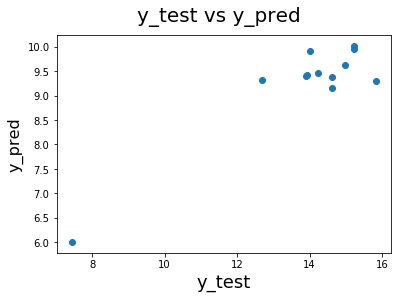

In [93]:
X_test2=X_test[['product_analytic_vertical_GamingMousePad','product_analytic_vertical_CameraBattery',\
                'product_mrp','s1_fact.order_payment_type_Prepaid']]
X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = mm7.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  



In [94]:
#RMSE calculation test data
math.sqrt(np.mean(np.square((y_pred-y_test))))

4.80277851630223

In [95]:
np.exp(math.sqrt(np.mean(np.square((y_pred-y_test)))))

121.84850566891227

### Koyck Model

In [99]:
#making klag df from original df
GamingAccessoryWeekly_klag=GamingAccessoryWeekly

In [100]:
GamingAccessoryWeekly_klag['gmv_prev']=GamingAccessoryWeekly_klag.gmv.shift(1)

In [101]:
#Checking values
GamingAccessoryWeekly_klag[['gmv','gmv_prev']]
#GamingAccessoryWeekly_klag.fillna(0)

,gmv,gmv_prev
0,1.995145e+06,NaN
1,1.165937e+06,1.995145e+06
2,1.522536e+06,1.165937e+06
3,1.102687e+06,1.522536e+06
4,5.732990e+06,1.102687e+06
5,2.540095e+06,5.732990e+06
6,1.944539e+06,2.540095e+06
7,2.530973e+06,1.944539e+06
8,2.654044e+06,2.530973e+06
9,2.010452e+06,2.654044e+06


In [102]:
GamingAccessoryWeekly_kf=GamingAccessoryWeekly_klag.dropna()

In [103]:
GamingAccessoryWeekly_kf.shape

(39, 74)

In [104]:
# scaling df
scaler = StandardScaler()
scaler.fit(GamingAccessoryWeekly_kf)
# divide data into train and test
df_train,df_test = train_test_split(GamingAccessoryWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [105]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

72

In [106]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

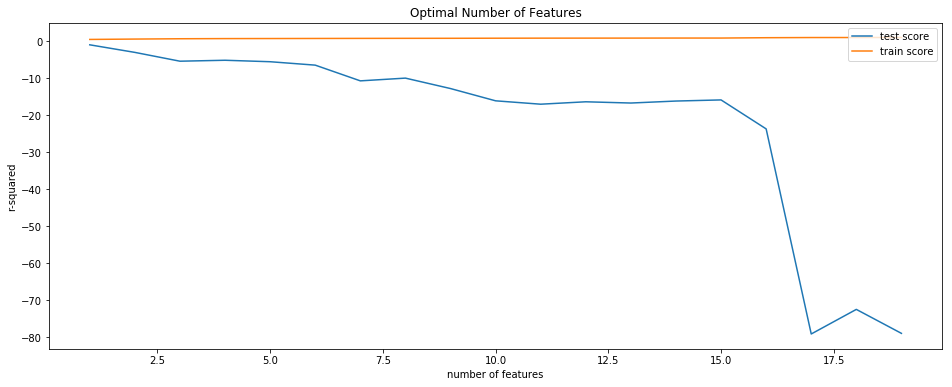

In [129]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [107]:
#10 seems optimal no of features 
print(df_train.shape)
print(df_test.shape)

(28, 72)
(12, 72)


##### Making first Koyck Model

In [108]:
# Running RFE with the optimum number of the variable equal to 10
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
col = x_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     8.370
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.10e-05
Time:                        22:02:02   Log-Likelihood:                -430.46
No. Observations:                  28   AIC:                             880.9
Df Residuals:                      18   BIC:                             894.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [109]:
# Calculate the VIFs for the new model
checkVIF(x_train_rfe)

,Features,VIF
6,product_analytic_vertical_GamePad,66197.43
1,product_analytic_vertical_CameraBattery,20061.52
8,product_analytic_vertical_HomeAudioSpeaker,6564.52
3,product_analytic_vertical_CameraTripod,1202.81
7,product_analytic_vertical_GamingSpeaker,201.89
9,product_analytic_vertical_SoundMixer,54.02
0,product_analytic_vertical_BoomBox,37.10
2,product_analytic_vertical_CameraBatteryGrip,14.67
4,product_analytic_vertical_DJController,5.52
5,product_analytic_vertical_ExtensionTube,4.90


In [110]:
#koyck Model 2
# Removing product_analytic_vertical_GamePad since it has high p and high VIF
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_GamePad"], axis = 1) 
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     2.143
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0806
Time:                        22:02:44   Log-Likelihood:                -430.29
No. Observations:                  28   AIC:                             880.6
Df Residuals:                      18   BIC:                             893.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [111]:
# Calculate the VIFs for the new model
checkVIF(x_train_md2)

,Features,VIF
3,product_analytic_vertical_CameraTripod,70.81
7,product_analytic_vertical_HomeAudioSpeaker,43.44
1,product_analytic_vertical_CameraBattery,20.11
4,product_analytic_vertical_DJController,5.52
5,product_analytic_vertical_ExtensionTube,4.90
0,product_analytic_vertical_BoomBox,4.21
2,product_analytic_vertical_CameraBatteryGrip,2.71
6,product_analytic_vertical_GamingSpeaker,2.13
8,product_analytic_vertical_SoundMixer,2.02


In [112]:
#koyck Model 3
# Removing product_analytic_vertical_CameraTripod since it has high p and high VIF
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_CameraTripod"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     2.324
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0628
Time:                        22:03:45   Log-Likelihood:                -430.93
No. Observations:                  28   AIC:                             879.9
Df Residuals:                      19   BIC:                             891.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [113]:
# Calculate the VIFs for the new model
checkVIF(x_train_md3)

,Features,VIF
6,product_analytic_vertical_HomeAudioSpeaker,11.18
1,product_analytic_vertical_CameraBattery,10.12
3,product_analytic_vertical_DJController,5.52
4,product_analytic_vertical_ExtensionTube,4.90
0,product_analytic_vertical_BoomBox,2.54
2,product_analytic_vertical_CameraBatteryGrip,2.21
5,product_analytic_vertical_GamingSpeaker,2.11
7,product_analytic_vertical_SoundMixer,1.99


In [114]:
#koyck Model 4
# Removing product_analytic_vertical_HomeAudioSpeaker since it has high VIF
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_HomeAudioSpeaker"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     2.705
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0381
Time:                        22:04:12   Log-Likelihood:                -431.16
No. Observations:                  28   AIC:                             878.3
Df Residuals:                      20   BIC:                             889.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [115]:
checkVIF(x_train_md4)

,Features,VIF
3,product_analytic_vertical_DJController,5.51
4,product_analytic_vertical_ExtensionTube,4.90
0,product_analytic_vertical_BoomBox,2.53
2,product_analytic_vertical_CameraBatteryGrip,2.21
6,product_analytic_vertical_SoundMixer,1.81
1,product_analytic_vertical_CameraBattery,1.78
5,product_analytic_vertical_GamingSpeaker,1.39


In [116]:
#koyck Model 5
# Removing product_analytic_vertical_DJController since it has high VIF
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_DJController"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     1.941
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.121
Time:                        22:04:53   Log-Likelihood:                -434.31
No. Observations:                  28   AIC:                             882.6
Df Residuals:                      21   BIC:                             891.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [117]:
checkVIF(x_train_md5)

,Features,VIF
0,product_analytic_vertical_BoomBox,2.52
2,product_analytic_vertical_CameraBatteryGrip,2.19
1,product_analytic_vertical_CameraBattery,1.70
5,product_analytic_vertical_SoundMixer,1.56
4,product_analytic_vertical_GamingSpeaker,1.39
3,product_analytic_vertical_ExtensionTube,1.26


In [118]:
#koyck Model 6
# Removing product_analytic_vertical_SoundMixer since it has high VIF
x_train_md6 = x_train_md5.drop(["product_analytic_vertical_SoundMixer"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     2.439
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0666
Time:                        22:05:21   Log-Likelihood:                -434.31
No. Observations:                  28   AIC:                             880.6
Df Residuals:                      22   BIC:                             888.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [119]:
checkVIF(x_train_md6)

,Features,VIF
0,product_analytic_vertical_BoomBox,2.48
2,product_analytic_vertical_CameraBatteryGrip,2.12
1,product_analytic_vertical_CameraBattery,1.64
3,product_analytic_vertical_ExtensionTube,1.21
4,product_analytic_vertical_GamingSpeaker,1.10


In [120]:
#koyck Model 7
# Removing product_analytic_vertical_ExtensionTube since it has high p
x_train_md7 = x_train_md6.drop(["product_analytic_vertical_ExtensionTube"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md7)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.096
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0355
Time:                        22:06:00   Log-Likelihood:                -434.45
No. Observations:                  28   AIC:                             878.9
Df Residuals:                      23   BIC:                             885.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [121]:
checkVIF(x_train_md7)

,Features,VIF
0,product_analytic_vertical_BoomBox,2.41
2,product_analytic_vertical_CameraBatteryGrip,2.04
1,product_analytic_vertical_CameraBattery,1.44
3,product_analytic_vertical_GamingSpeaker,1.10


In [122]:
#koyck Model 8
# Removing Content product_analytic_vertical_GamingSpeaker since it has high p
x_train_md8 = x_train_md7.drop(["product_analytic_vertical_GamingSpeaker"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md8)
koyckModel = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(koyckModel.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     3.639
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0270
Time:                        22:06:32   Log-Likelihood:                -435.24
No. Observations:                  28   AIC:                             878.5
Df Residuals:                      24   BIC:                             883.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [123]:
checkVIF(x_train_md8)

,Features,VIF
0,product_analytic_vertical_BoomBox,2.40
2,product_analytic_vertical_CameraBatteryGrip,1.99
1,product_analytic_vertical_CameraBattery,1.39


In [127]:
#koyck Model 9
# Removing Content product_analytic_vertical_BoomBox since it has high p
x_train_md9 = x_train_md8.drop(["product_analytic_vertical_BoomBox"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md9)
koyckModel9 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(koyckModel9.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     3.240
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0561
Time:                        22:08:37   Log-Likelihood:                -437.26
No. Observations:                  28   AIC:                             880.5
Df Residuals:                      25   BIC:                             884.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [128]:
checkVIF(x_train_md9)

,Features,VIF
0,product_analytic_vertical_CameraBattery,1.15
1,product_analytic_vertical_CameraBatteryGrip,1.15


### Koyck Model Evaluation

Text(0,0.5,'y_pred')

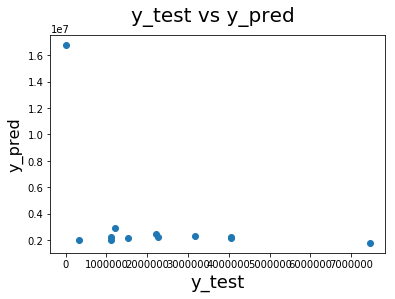

In [129]:
X_test2=X_test[['product_analytic_vertical_CameraBattery','product_analytic_vertical_CameraBatteryGrip',]]
X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = koyckModel9.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  


In [167]:
#RMSE calculation test data
math.sqrt(np.mean(np.square(((y_pred-y_test)/10000))))

133.7351368958486

#### Distributed lag model

In [131]:
def constants(df):
    new_columns = ["{}_Int".format(variable) for variable in df.columns]
    return pd.DataFrame(np.ones_like(df.loc[:,:]), index=df.index, columns=new_columns)

def lag(df, n):
    new_columns = ["{}_Lag{:02d}".format(variable, n) for variable in df.columns]
    new_df = df.shift(n)
    new_df.columns = new_columns
    return new_df

In [132]:
GamingAccessoryWeekly_lag=lag(GamingAccessoryWeekly,1)

In [133]:
GamingAccessoryWeekly_lag.head()

,order_week_Lag01,gmv_Lag01,sla_Lag01,product_procurement_sla_Lag01,s1_fact.order_payment_type_Prepaid_Lag01,product_mrp_Lag01,sale_price_per_unit_Lag01,spec_days_Lag01,NPS_Lag01,Stock Index_Lag01,...,Max Temp (°C)_Lag01,Min Temp (°C)_Lag01,Mean Temp (°C)_Lag01,Heat Deg Days (°C)_Lag01,Cool Deg Days (°C)_Lag01,Total Rain (mm)_Lag01,Total Snow (cm)_Lag01,Total Precip (mm)_Lag01,Snow on Grnd (cm)_Lag01,gmv_prev_Lag01
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.0,1995145.0,6.920982,2.890217,0.328197,2908.601833,1882.375478,0.000000,1.761277,37.967742,...,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0,NaN
2,29.0,1165937.0,6.687517,3.076684,0.292012,2120.135985,1396.624709,0.272727,1.761277,37.967742,...,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0,1995145.0
3,30.0,1522536.0,6.631879,2.930972,0.240420,2007.009880,1227.253155,0.000000,1.761277,37.967742,...,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.0,0.900000,0.0,1165937.0
4,31.0,1102687.0,6.757147,2.790641,0.279428,2723.652035,1433.897291,0.000000,1.761277,37.967742,...,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0,1522536.0


In [134]:
GamingAccessoryWeekly_lag = GamingAccessoryWeekly_lag.fillna(0)

In [135]:
GamingAccessoryWeekly_lag

,order_week_Lag01,gmv_Lag01,sla_Lag01,product_procurement_sla_Lag01,s1_fact.order_payment_type_Prepaid_Lag01,product_mrp_Lag01,sale_price_per_unit_Lag01,spec_days_Lag01,NPS_Lag01,Stock Index_Lag01,...,Max Temp (°C)_Lag01,Min Temp (°C)_Lag01,Mean Temp (°C)_Lag01,Heat Deg Days (°C)_Lag01,Cool Deg Days (°C)_Lag01,Total Rain (mm)_Lag01,Total Snow (cm)_Lag01,Total Precip (mm)_Lag01,Snow on Grnd (cm)_Lag01,gmv_prev_Lag01
0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,28.0,1.995145e+06,6.920982,2.890217,0.328197,2908.601833,1882.375478,0.000000,1.761277,37.967742,...,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.000000,4.416667,0.000000,0.000000e+00
2,29.0,1.165937e+06,6.687517,3.076684,0.292012,2120.135985,1396.624709,0.272727,1.761277,37.967742,...,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.000000,1.400000,0.000000,1.995145e+06
3,30.0,1.522536e+06,6.631879,2.930972,0.240420,2007.009880,1227.253155,0.000000,1.761277,37.967742,...,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.000000,0.900000,0.000000,1.165937e+06
4,31.0,1.102687e+06,6.757147,2.790641,0.279428,2723.652035,1433.897291,0.000000,1.761277,37.967742,...,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.000000,4.633333,0.000000,1.522536e+06
5,36.0,5.732990e+06,6.006013,2.618028,0.254691,2312.161381,1559.809090,0.000000,1.597718,36.899228,...,30.416667,18.700000,24.460000,0.000000,6.460000,10.100000,0.000000,10.100000,0.000000,1.102687e+06
6,37.0,2.540095e+06,5.802334,2.535930,0.263416,2105.957718,1383.166780,0.000000,1.564181,36.700000,...,23.500000,14.900000,19.240000,1.280000,2.520000,0.960000,0.000000,0.960000,0.000000,5.732990e+06
7,38.0,1.944539e+06,6.489396,2.655137,0.195941,2461.180189,1711.370420,0.000000,1.564181,36.700000,...,24.750000,16.250000,20.550000,0.000000,2.550000,0.550000,0.000000,0.550000,0.000000,2.540095e+06
8,39.0,2.530973e+06,6.298842,2.461937,0.237061,2338.346697,1520.310550,0.000000,1.564181,36.700000,...,26.000000,14.500000,20.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.944539e+06
9,40.0,2.654044e+06,6.823831,2.701120,0.263923,2839.532623,1522.612071,0.000000,1.432206,39.032258,...,19.700000,14.125000,17.725000,1.925000,1.650000,3.720000,0.000000,3.720000,0.000000,2.530973e+06


In [136]:
# Scale the data
scaler = StandardScaler()
scaler.fit(GamingAccessoryWeekly_lag)
# divide data into train and test
df_train,df_test = train_test_split(GamingAccessoryWeekly_lag,train_size=0.7,test_size=0.3,random_state=True)

In [137]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv_Lag01')
X_train = df_train

y_test = df_test.pop('gmv_Lag01')
X_test = df_test

# number of features in X_train
len(X_train.columns)

73

In [138]:
# doing cv on lag data
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

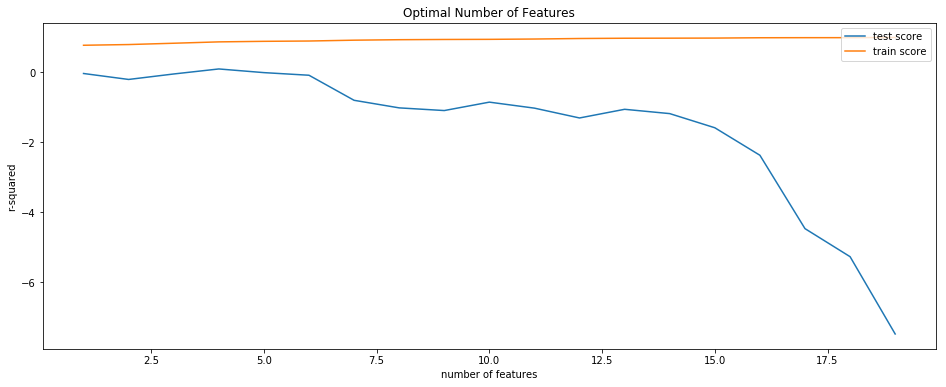

In [197]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [139]:
# Again 10 features seems good
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]

In [140]:
x_train_rfe = X_train[col]

In [141]:
# Creating First lag model
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     3.794
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00300
Time:                        22:15:06   Log-Likelihood:                -570.39
No. Observations:                  37   AIC:                             1163.
Df Residuals:                      26   BIC:                             1181.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [142]:
checkVIF(x_train_rfe)

,Features,VIF
2,product_analytic_vertical_CameraBattery_Lag01,462.30
6,product_analytic_vertical_GamePad_Lag01,461.03
4,product_analytic_vertical_CameraTripod_Lag01,57.00
9,product_analytic_vertical_HomeAudioSpeaker_Lag01,39.89
1,product_analytic_vertical_Binoculars_Lag01,33.34
8,product_analytic_vertical_GamingMouse_Lag01,8.02
7,product_analytic_vertical_GamingAccessoryKit_L...,7.44
0,const,4.04
10,product_analytic_vertical_Telescope_Lag01,2.77
5,product_analytic_vertical_DockingStation_Lag01,2.73


In [143]:
#Distributed Lag model 2
# Removing product_analytic_vertical_CameraBattery_Lag01 since it has high p 
     
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_CameraBattery_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     3.951
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00262
Time:                        22:15:56   Log-Likelihood:                -571.50
No. Observations:                  37   AIC:                             1163.
Df Residuals:                      27   BIC:                             1179.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [145]:
checkVIF(x_train_md2)

,Features,VIF
3,product_analytic_vertical_CameraTripod_Lag01,42.32
1,product_analytic_vertical_Binoculars_Lag01,32.59
8,product_analytic_vertical_HomeAudioSpeaker_Lag01,17.98
6,product_analytic_vertical_GamingAccessoryKit_L...,7.43
7,product_analytic_vertical_GamingMouse_Lag01,6.75
0,const,4.04
4,product_analytic_vertical_DockingStation_Lag01,2.73
9,product_analytic_vertical_Telescope_Lag01,2.70
2,product_analytic_vertical_CameraHousing_Lag01,2.57
5,product_analytic_vertical_GamePad_Lag01,1.00


In [146]:
#Lag Model 3
# Removing product_analytic_vertical_GamingMouse_Lag01   since it has high p 
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_GamingMouse_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     3.663
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00489
Time:                        22:23:00   Log-Likelihood:                -573.79
No. Observations:                  37   AIC:                             1166.
Df Residuals:                      28   BIC:                             1180.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [147]:
checkVIF(x_train_md3)

,Features,VIF
3,product_analytic_vertical_CameraTripod_Lag01,41.37
1,product_analytic_vertical_Binoculars_Lag01,30.93
7,product_analytic_vertical_HomeAudioSpeaker_Lag01,17.97
6,product_analytic_vertical_GamingAccessoryKit_L...,7.41
0,const,3.92
4,product_analytic_vertical_DockingStation_Lag01,2.72
8,product_analytic_vertical_Telescope_Lag01,2.61
2,product_analytic_vertical_CameraHousing_Lag01,2.54
5,product_analytic_vertical_GamePad_Lag01,1.00


In [148]:
#MLag Model 4
# Removing product_analytic_vertical_CameraTripod_Lag01 since it has high p 
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_CameraTripod_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     1.849
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.115
Time:                        22:23:28   Log-Likelihood:                -580.22
No. Observations:                  37   AIC:                             1176.
Df Residuals:                      29   BIC:                             1189.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [149]:
checkVIF(x_train_md4)

,Features,VIF
1,product_analytic_vertical_Binoculars_Lag01,8.06
6,product_analytic_vertical_HomeAudioSpeaker_Lag01,7.26
5,product_analytic_vertical_GamingAccessoryKit_L...,5.25
0,const,3.86
3,product_analytic_vertical_DockingStation_Lag01,2.16
2,product_analytic_vertical_CameraHousing_Lag01,2.08
7,product_analytic_vertical_Telescope_Lag01,1.39
4,product_analytic_vertical_GamePad_Lag01,1.00


In [150]:
#Lag Model 5
# Removing product_analytic_vertical_Binoculars_Lag01 since it has high p 
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_Binoculars_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.762
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.141
Time:                        22:24:45   Log-Likelihood:                -581.46
No. Observations:                  37   AIC:                             1177.
Df Residuals:                      30   BIC:                             1188.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [151]:
checkVIF(x_train_md5)

,Features,VIF
5,product_analytic_vertical_HomeAudioSpeaker_Lag01,4.46
4,product_analytic_vertical_GamingAccessoryKit_L...,4.23
0,const,3.76
2,product_analytic_vertical_DockingStation_Lag01,2.16
1,product_analytic_vertical_CameraHousing_Lag01,2.08
6,product_analytic_vertical_Telescope_Lag01,1.36
3,product_analytic_vertical_GamePad_Lag01,1.00


In [154]:
#Lag Model 6
# Removing product_analytic_vertical_HomeAudioSpeaker_Lag01 since it has high p 
x_train_md6 = x_train_md5.drop(["product_analytic_vertical_HomeAudioSpeaker_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
dl = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(dl.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2.123
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0890
Time:                        22:28:09   Log-Likelihood:                -581.60
No. Observations:                  37   AIC:                             1175.
Df Residuals:                      31   BIC:                             1185.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [155]:
checkVIF(x_train_md6)

,Features,VIF
0,const,3.52
2,product_analytic_vertical_DockingStation_Lag01,2.16
1,product_analytic_vertical_CameraHousing_Lag01,2.05
5,product_analytic_vertical_Telescope_Lag01,1.26
4,product_analytic_vertical_GamingAccessoryKit_L...,1.07
3,product_analytic_vertical_GamePad_Lag01,1.00


In [156]:
#Lag Model 7
# Removing product_analytic_vertical_GamePad_Lag01 since it has high p 
x_train_md7 = x_train_md6.drop(["product_analytic_vertical_GamePad_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md7)
dl = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(dl.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     2.725
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0465
Time:                        22:30:32   Log-Likelihood:                -581.62
No. Observations:                  37   AIC:                             1173.
Df Residuals:                      32   BIC:                             1181.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [157]:
checkVIF(x_train_md7)

,Features,VIF
0,const,3.11
2,product_analytic_vertical_DockingStation_Lag01,2.16
1,product_analytic_vertical_CameraHousing_Lag01,2.05
4,product_analytic_vertical_Telescope_Lag01,1.26
3,product_analytic_vertical_GamingAccessoryKit_L...,1.07


In [159]:
#Lag Model 8
# Removing product_analytic_vertical_Telescope_Lag01 since it has high p 
x_train_md8 = x_train_md7.drop(["product_analytic_vertical_Telescope_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md8)
dl2 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(dl2.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3.745
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0202
Time:                        22:32:26   Log-Likelihood:                -581.62
No. Observations:                  37   AIC:                             1171.
Df Residuals:                      33   BIC:                             1178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [160]:
checkVIF(x_train_md8)

,Features,VIF
0,const,3.06
1,product_analytic_vertical_CameraHousing_Lag01,1.81
2,product_analytic_vertical_DockingStation_Lag01,1.80
3,product_analytic_vertical_GamingAccessoryKit_L...,1.02


In [162]:
#Lag Model 9
# Removing product_analytic_vertical_DockingStation_Lag01 since it has high p 
x_train_md9 = x_train_md8.drop(["product_analytic_vertical_DockingStation_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md9)
dl3 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(dl3.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5.537
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00829
Time:                        22:34:11   Log-Likelihood:                -581.83
No. Observations:                  37   AIC:                             1170.
Df Residuals:                      34   BIC:                             1174.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [163]:
checkVIF(x_train_md9)

,Features,VIF
0,const,2.97
1,product_analytic_vertical_CameraHousing_Lag01,1.02
2,product_analytic_vertical_GamingAccessoryKit_L...,1.02


### Model Evaluation

Text(0,0.5,'y_pred')

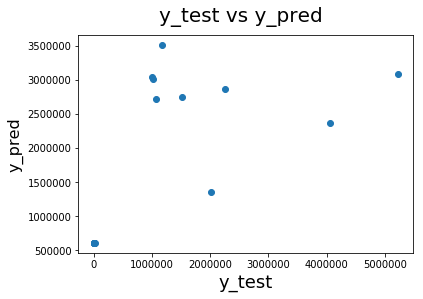

In [165]:
# we dint get good p value even after 9 iteration
#lets test the model
X_test2=X_test[['product_analytic_vertical_CameraHousing_Lag01','product_analytic_vertical_GamingAccessoryKit_Lag01']]

X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = dl3.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [166]:
#RMSE calculation test data
math.sqrt(np.mean(np.square(((y_pred-y_test)/10000))))

133.7351368958486